<center><h2>Line detection in recovered EPIs </h2></center>

In [219]:
# Import the libraries to use
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import time
%matplotlib inline
from PIL import Image

### Hough Transform in OpenCV

In [239]:
# Importing the image
name_inpainted = '../Diagrams/results/Inpainted/104_8_102_7_12_3_inpainted.png';
img = cv2.imread(name)
name_strip = '../Diagrams/results/EPIs/104_8_102_7_12_3_strip.png';

In [237]:
# Reading the size of the image in pixels
[size_y,size_x] = np.shape(img[:,:,0])

In [240]:
# Setting up the img to comput the lines 
img = cv2.imread(name_inpainted)
strip = cv2.imread(name_strip)
img_lines = cv2.imread(name_inpainted)
gray = cv2.cvtColor(img_lines,cv2.COLOR_BGR2GRAY)
# Compute edges in the image with Canny edge detector
edges = cv2.Canny(gray,50,150,apertureSize = 3)
# Compute image lines with Hough transform 
lines = cv2.HoughLines(edges,1,np.pi/180,200)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    if (x2-x1)!=0:
        if (y2-y1)/(x2-x1)!=0:
            cv2.line(img_lines,(x1,y1),(x2,y2),(0,0,255),2)

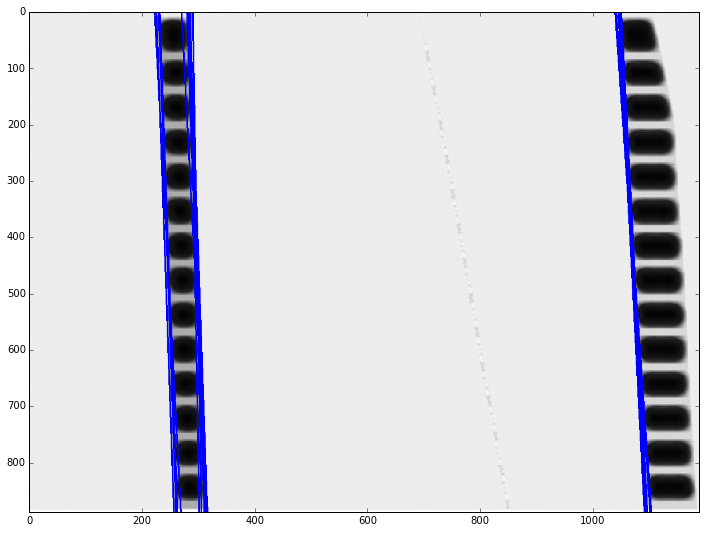

In [223]:
plt.rcParams["figure.figsize"] = [12,9]
plt.imshow(img_lines)
# plt.savefig('../Diagrams/results/Disparity_benchmark/673_10_102_4_48_8_lines.png')
plt.show()

Now we want to compute the slope of the lines.

In [224]:
def slope(lines,i,size_x,size_y):
    line = lines[i]
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    # Find the slope 
    slope = abs((y2-y1)/(x2-x1))*(size_x/size_y)*(1.1/683)
    return slope,x1,x2,y1,y2

In [228]:
lines.shape

(27, 1, 2)

In [230]:
img = cv2.imread(name_inpainted)
i = 21
slopei,x1,x2,y1,y2 = slope(lines,i,size_x,size_y);

In [231]:
cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2);

In [232]:
slopei

0.09180087847730602

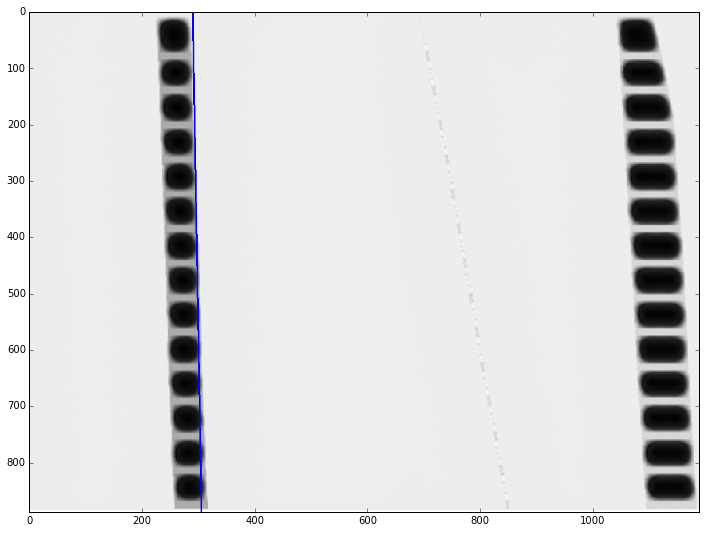

In [233]:
plt.imshow(img)

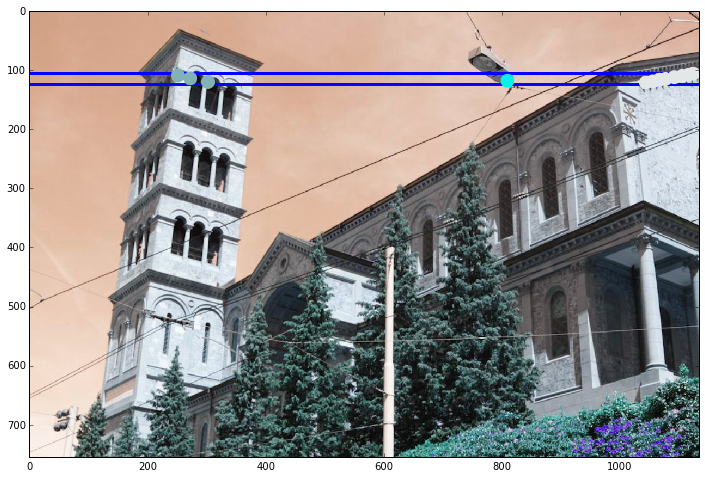

In [241]:
plt.rcParams["figure.figsize"] = [12,9]
plt.imshow(strip)
# plt.savefig('../Diagrams/results/Disparity_benchmark/673_10_102_4_48_8_lines.png')
plt.show()